<a href="https://colab.research.google.com/github/MANUELANDRESGV/How-to-implement-an-ML-pipeline/blob/master/Copia_de_MLP_%26_XOR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from random import randint
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#XOR
number_of_training_examples = 10000
def make_xor_sequence(n=number_of_training_examples):
    data = np.array([[randint(0,1),randint(0,1)]  for _ in range(n)]) # Input
    labels = np.bitwise_xor(data[:,0],data[:,1]) # Output
    labels = labels.reshape(len(labels),1)
    return data, labels

train_data, train_labels = make_xor_sequence()
validation_data, validation_labels = make_xor_sequence()

In [3]:
train_data#.reshape(20000)

array([[1, 0],
       [0, 1],
       [0, 0],
       ...,
       [1, 0],
       [0, 0],
       [0, 0]])

In [4]:
train_labels

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [5]:
print(f'input_shape: {train_data.shape} output_shape: {train_labels.shape}')

input_shape: (10000, 2) output_shape: (10000, 1)


In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2))) #Input layer
model.add(tf.keras.layers.Flatten())

#Hidden layers
#model.add(tf.keras.layers.Dense(10, activation=None)) #Linear
model.add(tf.keras.layers.Dense(16, activation='relu')) #Non-linear
model.add(tf.keras.layers.Dense(16, activation='relu')) #Non-linear
model.add(tf.keras.layers.Dense(16, activation='relu')) #Non-linear







model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #Output layer

In [40]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'],
             optimizer=tf.keras.optimizers.Adam())

In [41]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 2)                 0         
                                                                 
 dense_32 (Dense)            (None, 16)                48        
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [42]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",patience=2)

history = model.fit(train_data, train_labels, batch_size=100, epochs=100, validation_data=(validation_data, validation_labels), callbacks=[early_stopping])


Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.6613 - accuracy: 0.7072 - val_loss: 0.5910 - val_accuracy: 1.0000
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 1.0000 - val_loss: 0.1959 - val_accuracy: 1.0000
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 1.0000


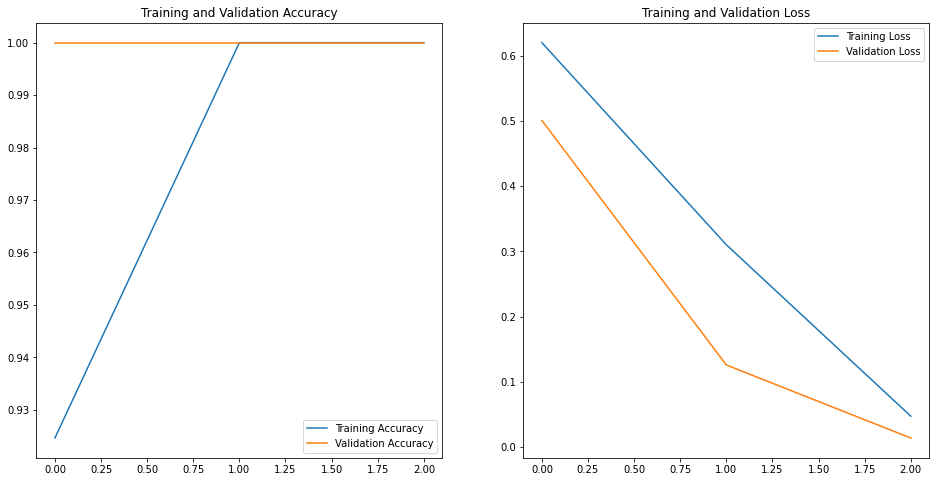

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
vb